In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as testRelation
from scipy.stats import chi2_contingency

# Load in Dataset

In [3]:
df=pd.read_csv("cybersecurity_attacks.csv")
df.head(10)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
5,2022-10-28 13:14:27,198.102.5.160,147.190.155.133,17430,52805,UDP,1423,Data,HTTP,Repellat quas illum harum fugit incidunt exerc...,...,Logged,Medium,Zeeshan Viswanathan,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,Segment C,"Aurangabad, Meghalaya",NaN,NaN,NaN,Server
6,2022-05-16 17:55:43,97.253.103.59,77.16.101.53,26562,17416,TCP,379,Data,DNS,Qui numquam inventore repellat ratione fugit o...,...,Ignored,High,Ehsaan Dalal,Opera/9.24.(X11; Linux i686; fa-IR) Presto/2.9...,Segment A,"Eluru, Manipur",NaN,Log Data,NaN,Server
7,2023-02-12 07:13:17,11.48.99.245,178.157.14.116,34489,20396,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,...,Logged,High,Yuvaan Dubey,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Segment A,"Phagwara, Andhra Pradesh",192.31.159.5,Log Data,Alert Data,Firewall
8,2023-06-27 11:02:56,49.32.208.167,72.202.237.9,56296,20857,TCP,1281,Control,FTP,Veritatis nihil amet atque molestias aperiam m...,...,Blocked,High,Zaina Iyer,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,Segment B,"Ambala, Tripura",NaN,Log Data,Alert Data,Server
9,2021-08-15 22:29:04,114.109.149.113,160.88.194.172,37918,50039,UDP,224,Data,HTTP,Consequatur ipsum autem reprehenderit quae. Do...,...,Blocked,Medium,Mishti Chaudhuri,Mozilla/5.0 (Windows; U; Windows NT 6.0) Apple...,Segment A,"Rampur, Mizoram",87.128.245.244,NaN,NaN,Server


In [4]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [5]:
# Check number of rows, columns
df.shape

(40000, 25)

In [6]:
# Check for null values, see df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [7]:
# Seeing number of null values
df.isnull().sum().sort_values(ascending=False)

Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Attack Type                   0
Geo-location Data             0
Network Segment               0
Device Information            0
User Information              0
Severity Level                0
Action Taken                  0
Attack Signature              0
Timestamp                     0
Source IP Address             0
Anomaly Scores                0
Payload Data                  0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Source Port                   0
Destination IP Address        0
Log Source                    0
dtype: int64

In the data cleaning steps, we will be handling duplicated / null values, and dropping any irrelevant columns in the dataFrame

## General Changes

In [10]:
# Check for duplicated values
df.duplicated().sum()

0

In [11]:
# Remove whitespace from column names
column_names_no_whitespace = [column for column in df.columns]
for column_index, column in enumerate(column_names_no_whitespace):
    if column[0] == ' ':
        column_names_no_whitespace[column_index] = column[1:]

df.columns = column_names_no_whitespace

In [12]:
# Remove infinite values from df
df = df[np.isfinite(df.select_dtypes(include = 'number')).all(1)]

## Handling null values

In [14]:
df.isna().sum().sort_values(ascending=False)

Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Attack Type                   0
Geo-location Data             0
Network Segment               0
Device Information            0
User Information              0
Severity Level                0
Action Taken                  0
Attack Signature              0
Timestamp                     0
Source IP Address             0
Anomaly Scores                0
Payload Data                  0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Source Port                   0
Destination IP Address        0
Log Source                    0
dtype: int64

### Replacing the Alerts/Warnings Column

In [16]:
# Checking the Alerts/Warning columns 
df['Alerts/Warnings'].value_counts()

Alerts/Warnings
Alert Triggered    19933
Name: count, dtype: int64

From this, we can see that the "Alerts/Warnings" column only has the Alert Triggered value. 
Based on the column name, we can assume that the other values should be "Alert Not Triggered", which I have set to be a unique value from "No Alert Triggered" in the "Alerts/Warnings" column

In [18]:
# Used this instead of inplace=True to avoid FutureWarning
# Replacing null values
df['Alerts/Warnings'] = df['Alerts/Warnings'].fillna("Alert Not Triggered")

In [19]:
# Checking for no null values
df['Alerts/Warnings'].isna().sum()

0

Now, there are no null values for the 'Alerts/Warnings' column

### Dropping the IDS/IPS Alerts Column

In [22]:
# Checking the existing values
df['IDS/IPS Alerts'].value_counts()

IDS/IPS Alerts
Alert Data    19950
Name: count, dtype: int64

From this, we can see that the "IDS/IPS Alerts" column has 19950 counts of the "Alert Data" value.
We have decided to drop this column.

In [24]:
# Dropping the column
df.drop('IDS/IPS Alerts',axis=1,inplace=True)

### Dropping the Malware Indicators Column

In [26]:
# Checking the existing values
df['Malware Indicators'].value_counts()

Malware Indicators
IoC Detected    20000
Name: count, dtype: int64

From this, we can see that the "Malware Indicators" column only has the "No IoC Detected" value. 
We have decided to drop this column

In [28]:
# Dropping the column
df.drop('Malware Indicators',axis=1,inplace=True)

### Dropping the Firewall Logs Column

In [30]:
# Checking the existing values
df['Firewall Logs'].value_counts()

Firewall Logs
Log Data    20039
Name: count, dtype: int64

From this, we can see that the "Firewall Logs" column only has the "Log Data" value. 
We have decided to drop this column

In [32]:
# Dropping the column
df.drop('Firewall Logs',axis=1,inplace=True)

### Dropping the Proxy Information Column

In [34]:
# Checking the existing values
df['Proxy Information'].value_counts()

Proxy Information
39.123.165.122     2
150.9.97.135       1
198.80.71.196      1
108.143.243.168    1
211.195.173.251    1
                  ..
205.112.169.158    1
78.192.52.63       1
157.191.153.187    1
205.183.87.116     1
112.169.115.139    1
Name: count, Length: 20148, dtype: int64

From this, we can see that the "Proxy Information" column has a lot of IP Addresses.
We have decided to drop this column.

In [36]:
# Dropping the column
df.drop('Proxy Information',axis=1,inplace=True)

### Checking for null values

In [38]:
df.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Log Source                0
dtype: int64

We can now see that the whole dataset has no null values already

In [40]:
df.head(3)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Alert Not Triggered,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Alert Not Triggered,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",Firewall


# Exploratory Data Analysis

### Analysis of Payload Data

In [43]:
df['Payload Data'].value_counts()

Payload Data
Qui natus odio asperiores nam. Optio nobis iusto accusamus ad perferendis esse at. Asperiores neque at ad.\nMaiores possimus ipsum saepe vitae. Ad possimus veritatis.              1
Doloremque at doloribus ipsam consequatur molestias placeat. Cumque minima vero numquam recusandae eos. In perspiciatis sed et iusto optio voluptatum.                              1
Ipsa at alias provident doloremque. Labore assumenda sint nam aliquid aperiam. Odio perspiciatis sed vel.                                                                           1
Doloribus accusantium quae veniam laboriosam. Reprehenderit ullam ullam vel vero repudiandae nesciunt officia. Accusantium consequatur alias porro.                                 1
Eaque consequatur ratione dolor animi vero. Maiores quisquam quasi. Tempora neque nihil placeat perspiciatis corrupti laboriosam aperiam.                                           1
                                                                             

In [44]:
# Dropping 'Payload Data' because it is unintelligble and has no patterns from value_counts() 
df.drop(['Payload Data'],axis=1,inplace=True)

### Analysis of Source IP Address

In [46]:
df['Source IP Address'].value_counts()

Source IP Address
103.216.15.12      1
74.225.47.66       1
147.178.224.232    1
119.183.250.156    1
80.60.140.131      1
                  ..
8.73.26.79         1
15.232.18.232      1
71.157.156.214     1
200.15.203.154     1
14.102.21.108      1
Name: count, Length: 40000, dtype: int64

In [47]:
# Dropping 'Source IP Address' because it has no obvious patterns
df.drop(['Source IP Address'],axis=1,inplace=True)

### Analysis of Destination IP Address

In [49]:
df['Destination IP Address'].value_counts()

Destination IP Address
84.9.164.252       1
131.248.231.186    1
48.157.39.218      1
112.135.140.167    1
125.252.191.10     1
                  ..
46.159.49.250      1
186.100.212.78     1
168.135.234.183    1
22.16.168.57       1
109.198.45.7       1
Name: count, Length: 40000, dtype: int64

In [50]:
# Dropping 'Destination IP Address' because it has no obvious patterns
df.drop(['Destination IP Address'],axis=1,inplace=True)

### Analysis of Geo-location Data

In [52]:
df['Geo-location Data'].value_counts()

Geo-location Data
Ghaziabad, Meghalaya          16
Kalyan-Dombivli, Jharkhand    15
Ghaziabad, Uttarakhand        14
Ghaziabad, Tripura            14
Kottayam, Nagaland            13
                              ..
Jamnagar, Telangana            1
Chandrapur, Nagaland           1
Giridih, Tamil Nadu            1
Gwalior, Rajasthan             1
Nagpur, Punjab                 1
Name: count, Length: 8723, dtype: int64

In [53]:
df.drop(['Geo-location Data'],axis=1,inplace=True)

### Analysis of User Information

In [55]:
df['User Information'].value_counts()

User Information
Ishaan Chaudhari    6
Heer Lad            6
Ishita Chaudry      5
Yasmin Ghose        5
Tara Madan          5
                   ..
Mohanlal Date       1
Indrans Randhawa    1
Uthkarsh Baria      1
Miraya Dua          1
Zaina Kumar         1
Name: count, Length: 32389, dtype: int64

In [56]:
df.drop(['User Information'],axis=1,inplace=True)

### Analysis of Source Port

In [58]:
df['Source Port'].value_counts()

Source Port
41341    6
31656    5
8653     5
24528    5
60026    5
        ..
49864    1
17928    1
20877    1
45259    1
50137    1
Name: count, Length: 29761, dtype: int64

In [59]:
df.drop(['Source Port'],axis=1,inplace=True)

### Analysis of Destination Port

In [61]:
df['Destination Port'].value_counts()

Destination Port
34117    6
7508     6
30804    5
37248    5
57508    5
        ..
7380     1
55244    1
60637    1
3884     1
25152    1
Name: count, Length: 29895, dtype: int64

In [62]:
df.drop(['Destination Port'],axis=1,inplace=True)

## Timestamp vs Severity Level

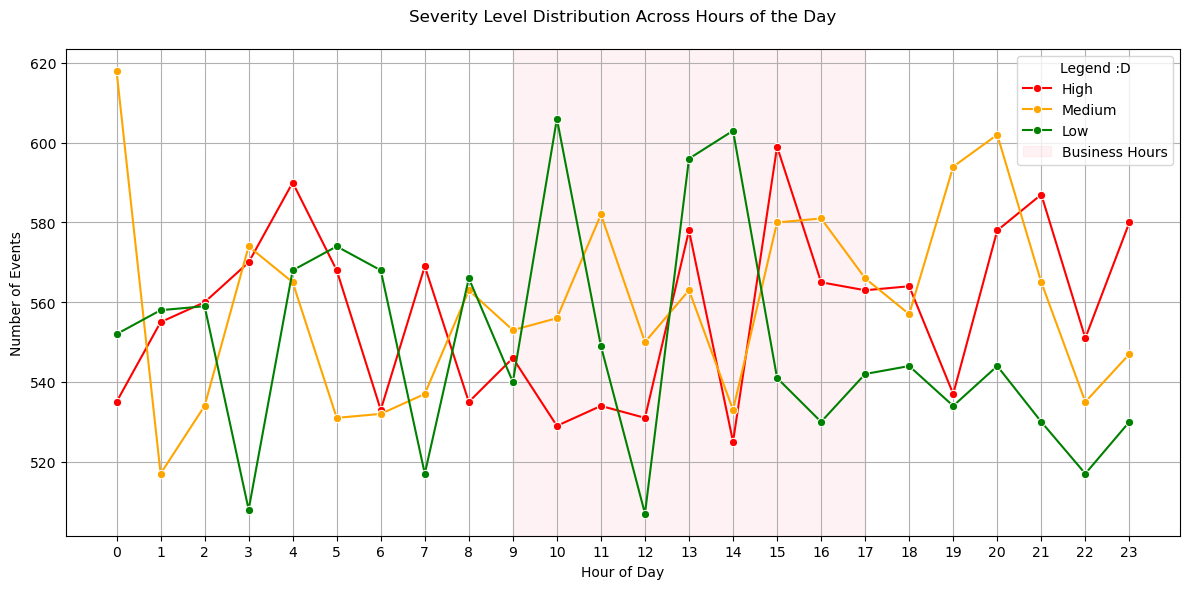

In [64]:
df['TimestampFormatted'] = pd.to_datetime(df['Timestamp']) #FE
df['Hour'] = df['TimestampFormatted'].dt.hour #FE

hourly_severity = df.groupby(['Hour', 'Severity Level']).size().reset_index(name='Count')
severity_order = ['High', 'Medium', 'Low']
color_dict = {
    'High': 'red',
    'Medium': 'orange',
    'Low': 'green'
}

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_severity, 
            x='Hour', 
            y='Count',
            hue='Severity Level',
            hue_order=severity_order,
            palette=color_dict,
            marker='o')

plt.title('Severity Level Distribution Across Hours of the Day', pad=20)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.xticks(range(0, 24))
plt.axvspan(9, 17, alpha=0.2, color='pink', label='Business Hours') # shade business hours 9am-5pm
plt.legend(title='Legend :D')
plt.tight_layout()
plt.grid(True)
plt.show()

### Business Hour and Severity Level Kruskal-Wallis H-Test

In [66]:
# Classify business hours
def business_hours(hour):
    return 1 if 9 <= hour <= 17 else 0  # 1 = Business Hours, 0 = Non-Business Hours

# Create BusinessHours column
df['Business Hours'] = df['TimestampFormatted'].dt.hour.apply(business_hours)

hstat, pvalue = testRelation.kruskal(
    df[df['Severity Level'] == 'Low']['Business Hours'],
    df[df['Severity Level'] == 'Medium']['Business Hours'],
    df[df['Severity Level'] == 'High']['Business Hours']
)
print(f"H-statistic: {hstat}, P-value: {pvalue}")

H-statistic: 2.30905315266565, P-value: 0.31520672791039556


### Severity Level for UDP Protocol

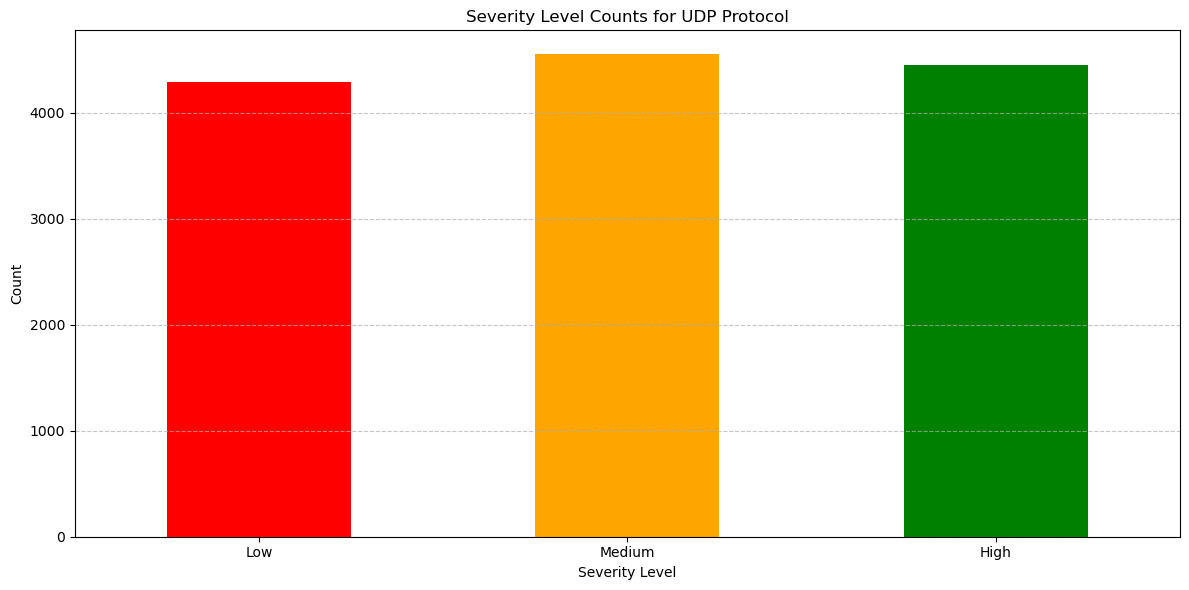

In [68]:
dfUDP = df[df['Protocol'] == 'UDP']
dfUDP = dfUDP['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfUDP.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for UDP Protocol')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Severity Level for TCP Protocol

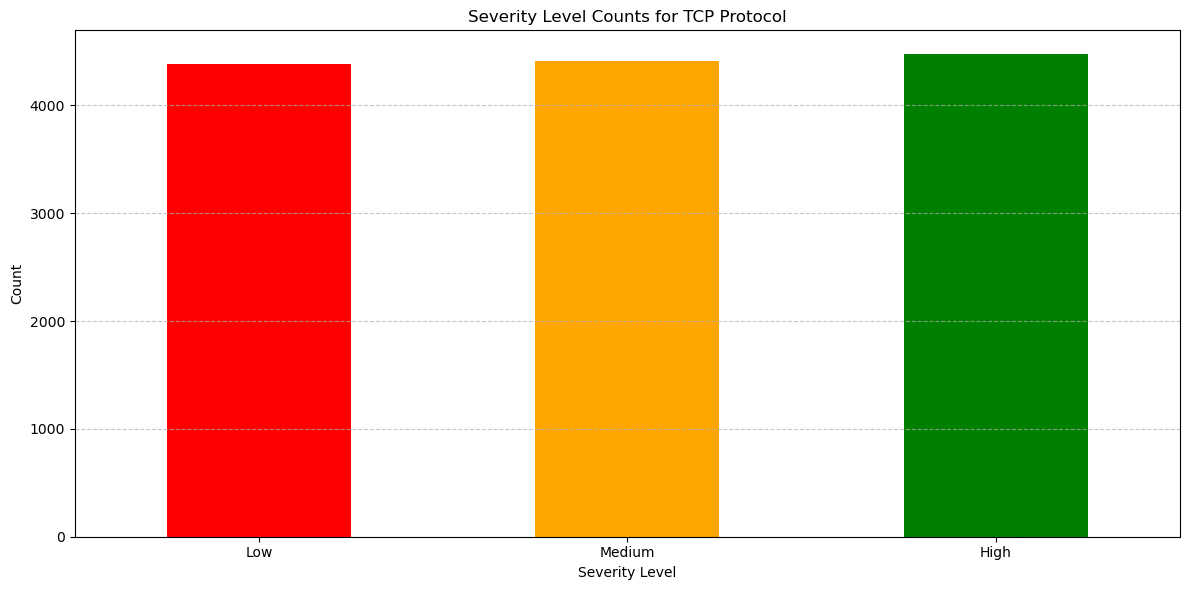

In [70]:
dfTCP = df[df['Protocol'] == 'TCP']
dfTCP = dfTCP['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfTCP.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for TCP Protocol')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Severity Level for ICMP Protocol

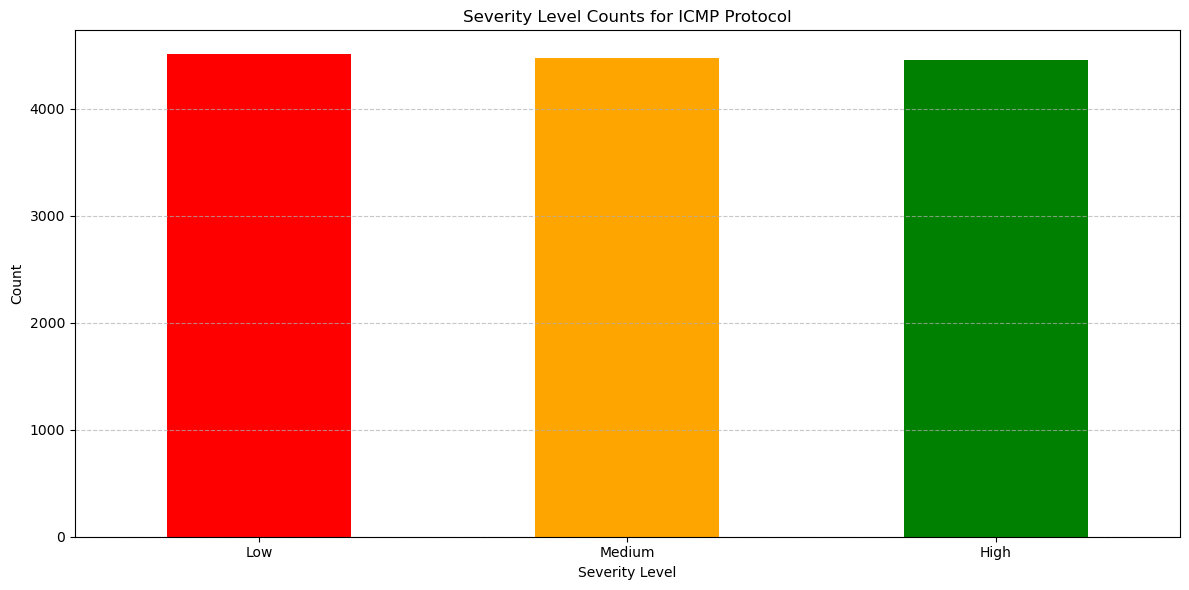

In [72]:
dfICMP = df[df['Protocol'] == 'ICMP']
dfICMP = dfICMP['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfICMP.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for ICMP Protocol')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Protocol and Severity Level Chi-Square Test

In [74]:
contingency_table = pd.crosstab(df['Protocol'], df['Severity Level'])

chi2, p, dof, expected_contingency_table = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

print("\nContingency Table:")
print(contingency_table)

print("\nExpected frequencies table:")
print(expected_contingency_table)

Chi-square test results:
Chi-square statistic: 6.324668383845298
P-value: 0.1761783981996304
Degrees of freedom: 4

Contingency Table:
Severity Level  High   Low  Medium
Protocol                          
ICMP            4455  4505    4469
TCP             4472  4386    4414
UDP             4455  4292    4552

Expected frequencies table:
[[4492.67195  4425.862675 4510.465375]
 [4440.1476   4374.1194   4457.733   ]
 [4449.18045  4383.017925 4466.801625]]


### Histogram of Packet Length with Low Severity Level

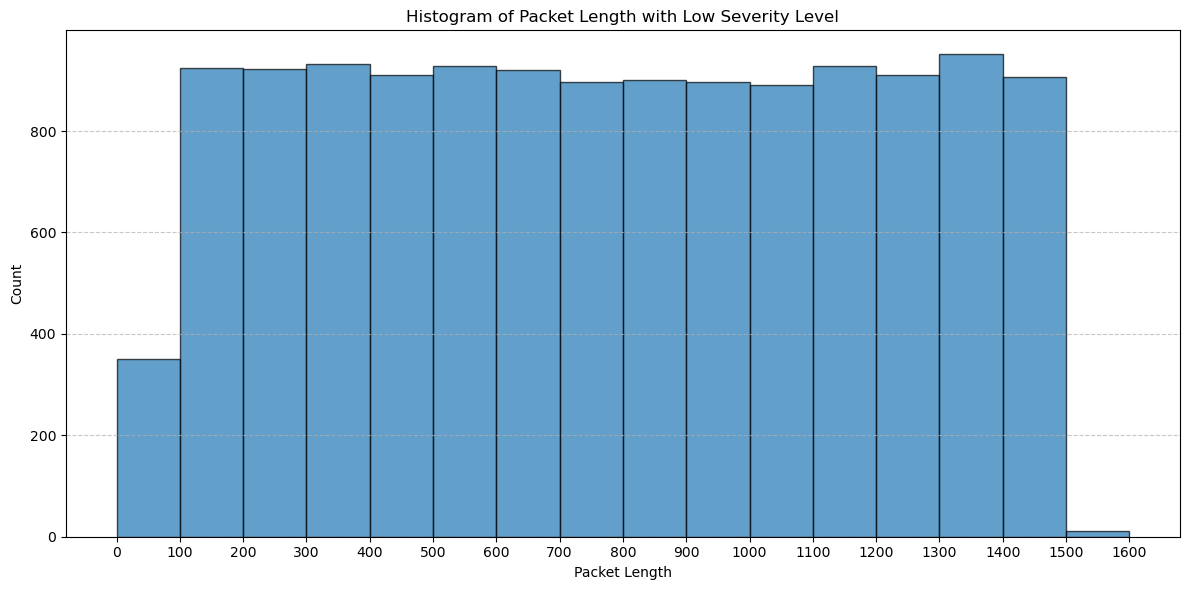

In [76]:
dfLow = df[df['Severity Level'] == 'Low'] #EF
bins = range(0, 1700, 100)  # for x axis to show 1-1600 in intervals of 100

plt.figure(figsize=(12, 6))
plt.hist(dfLow['Packet Length'], bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel('Packet Length')
plt.ylabel('Count')
plt.title('Histogram of Packet Length with Low Severity Level')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Histogram of Packet Length with Medium Severity Level

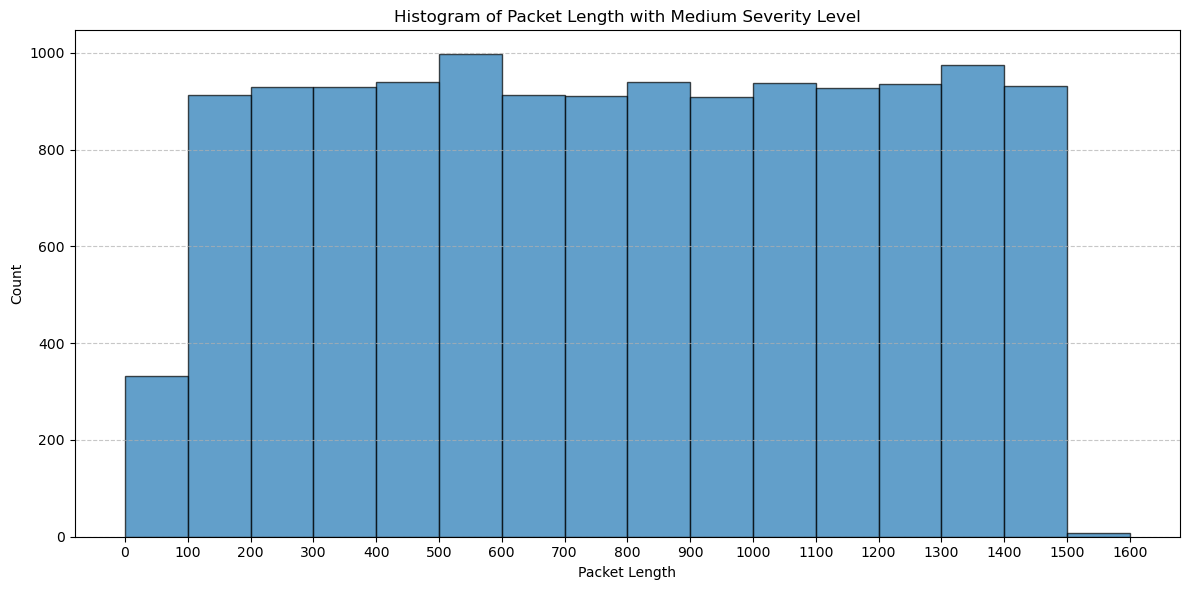

In [78]:
dfMedium = df[df['Severity Level'] == 'Medium'] #EF
bins = range(0, 1700, 100)  # for x axis to show 1-1600 in intervals of 100

plt.figure(figsize=(12, 6))
plt.hist(dfMedium['Packet Length'], bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel('Packet Length')
plt.ylabel('Count')
plt.title('Histogram of Packet Length with Medium Severity Level')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Histogram of Packet Length with High Severity Level

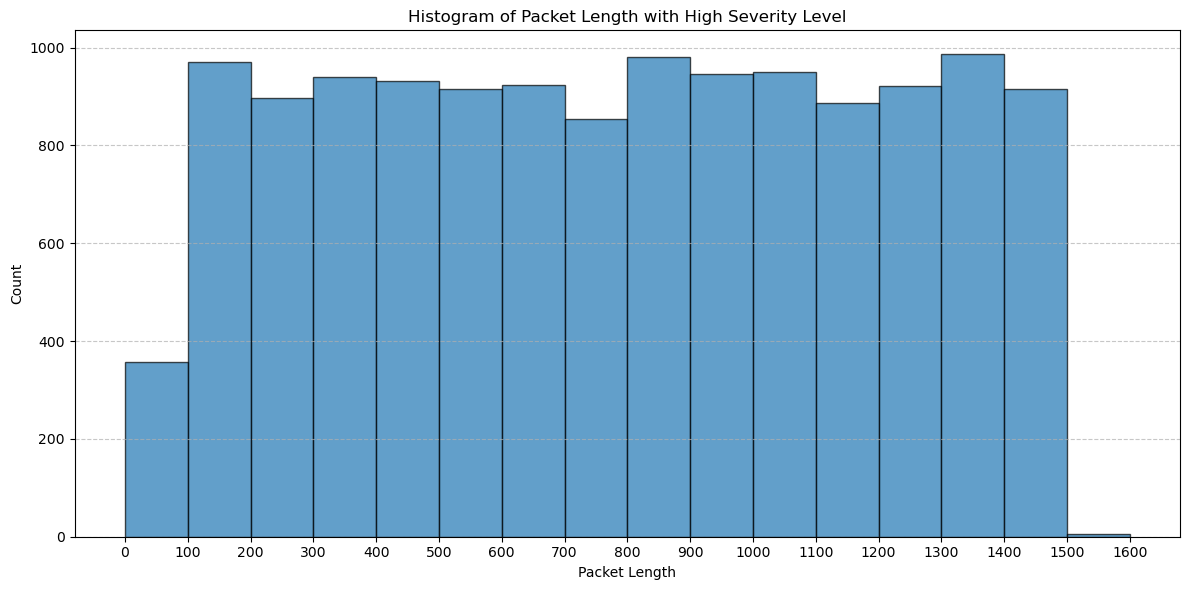

In [80]:
dfHigh = df[df['Severity Level'] == 'High'] #EF
bins = range(0, 1700, 100)  # for x axis to show 1-1600 in intervals of 100

plt.figure(figsize=(12, 6))
plt.hist(dfHigh['Packet Length'], bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel('Packet Length')
plt.ylabel('Count')
plt.title('Histogram of Packet Length with High Severity Level')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### BoxPlot of Packet Length and Severity Level

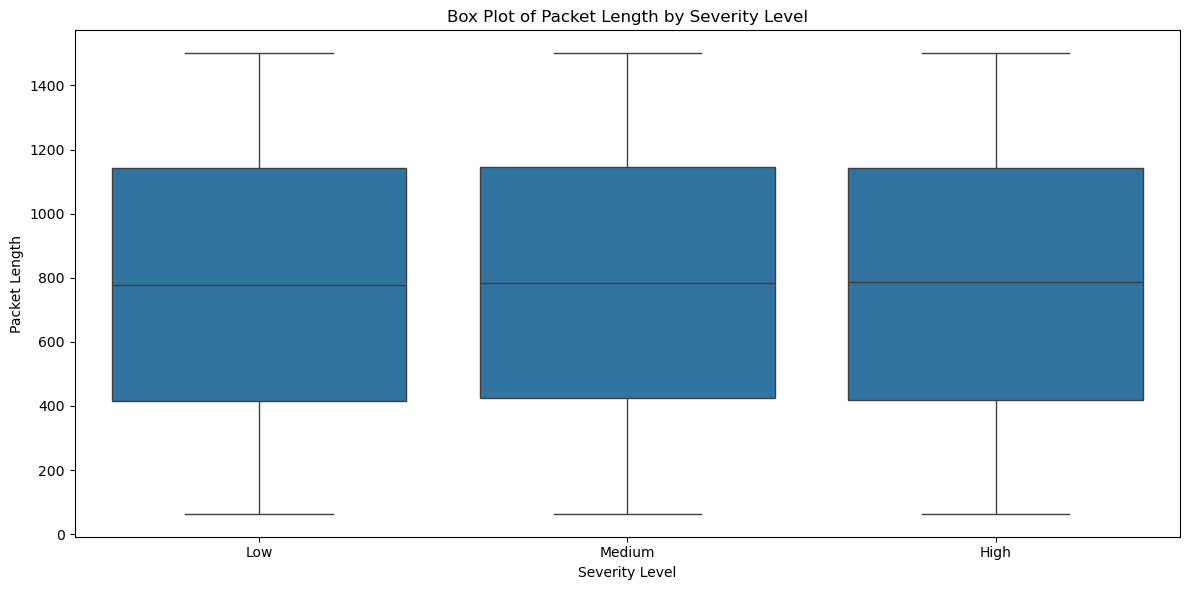

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Severity Level', y='Packet Length', data=df, order=['Low', 'Medium', 'High'])
plt.title('Box Plot of Packet Length by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Packet Length')
plt.tight_layout()
plt.show()

### Packet Length and Severity Level Kruskal-Wallis H-Test

In [84]:
hstat, pvalue = testRelation.kruskal(
    df[df['Severity Level'] == 'Low']['Packet Length'],
    df[df['Severity Level'] == 'Medium']['Packet Length'],
    df[df['Severity Level'] == 'High']['Packet Length']
)
print(f"H-statistic: {hstat}, P-value: {pvalue}")

H-statistic: 0.5601841104544103, P-value: 0.7557141708139075


### Severity Level for Data Packet Type

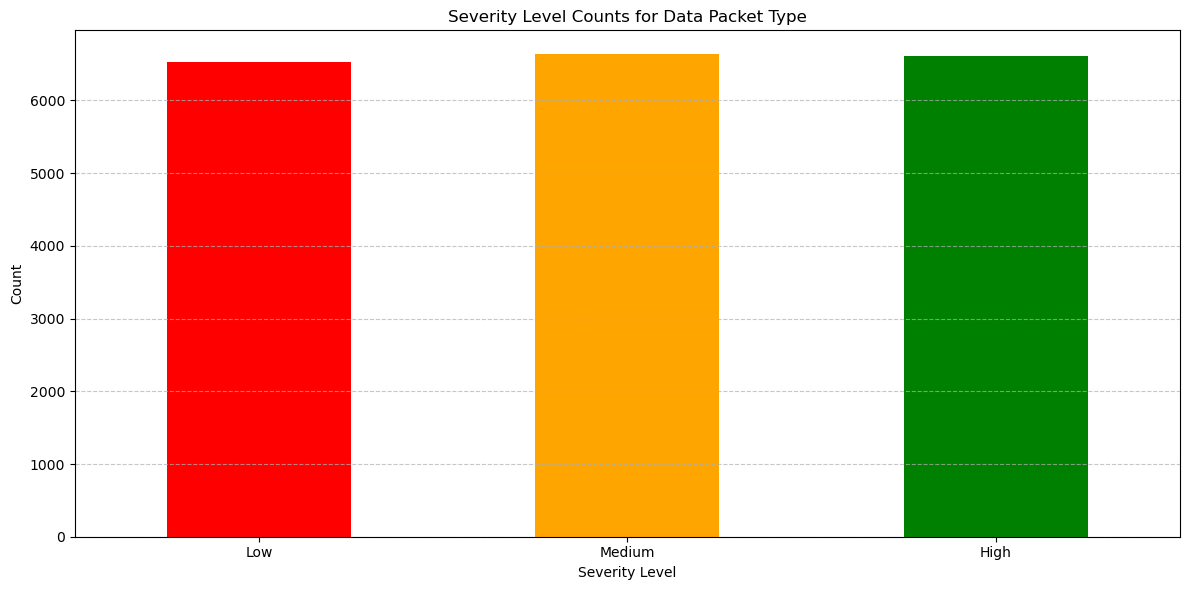

In [86]:
dfData = df[df['Packet Type'] == 'Data']
dfData = dfData['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfData.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Data Packet Type')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Severity Level for Control Packet Type

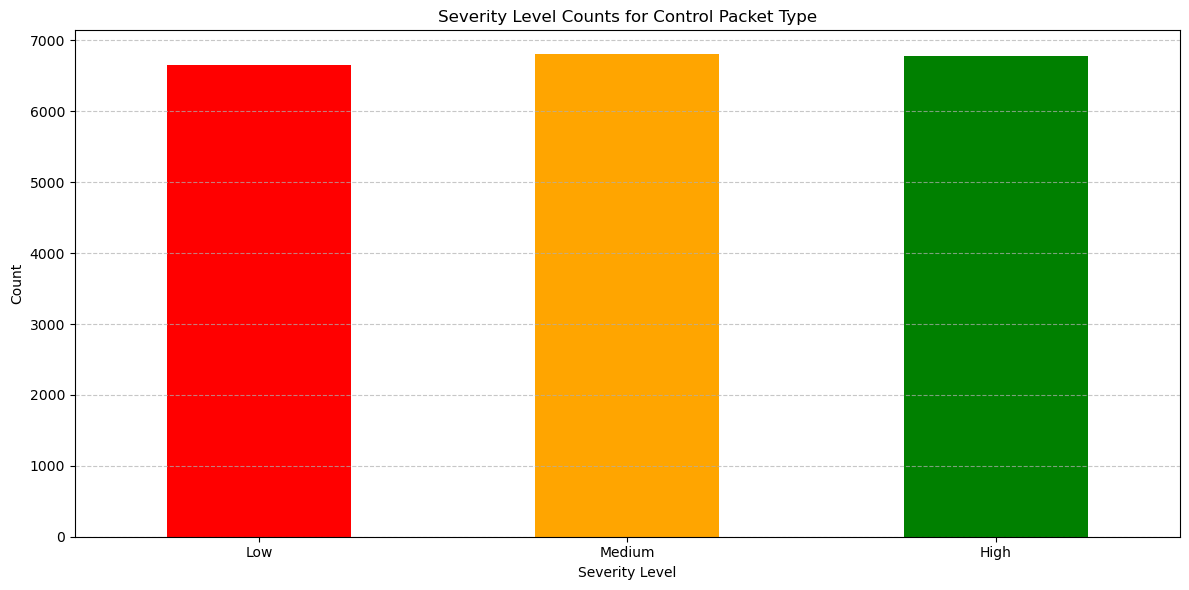

In [88]:
dfControl = df[df['Packet Type'] == 'Control']
dfControl = dfControl['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfControl.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Control Packet Type')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Packet Type and Severity Level Chi-Square Test

In [90]:
contingency_table = pd.crosstab(df['Packet Type'], df['Severity Level'])

chi2, p, dof, expected_contingency_table = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

print("\nContingency Table:")
print(contingency_table)

print("\nExpected frequencies table:")
print(expected_contingency_table)

Chi-square test results:
Chi-square statistic: 0.051052104631907715
P-value: 0.9747969829159397
Degrees of freedom: 2

Contingency Table:
Severity Level  High   Low  Medium
Packet Type                       
Control         6776  6659    6802
Data            6606  6524    6633

Expected frequencies table:
[[6770.28835  6669.609275 6797.102375]
 [6611.71165  6513.390725 6637.897625]]


### Severity Level for DNS Traffic Type

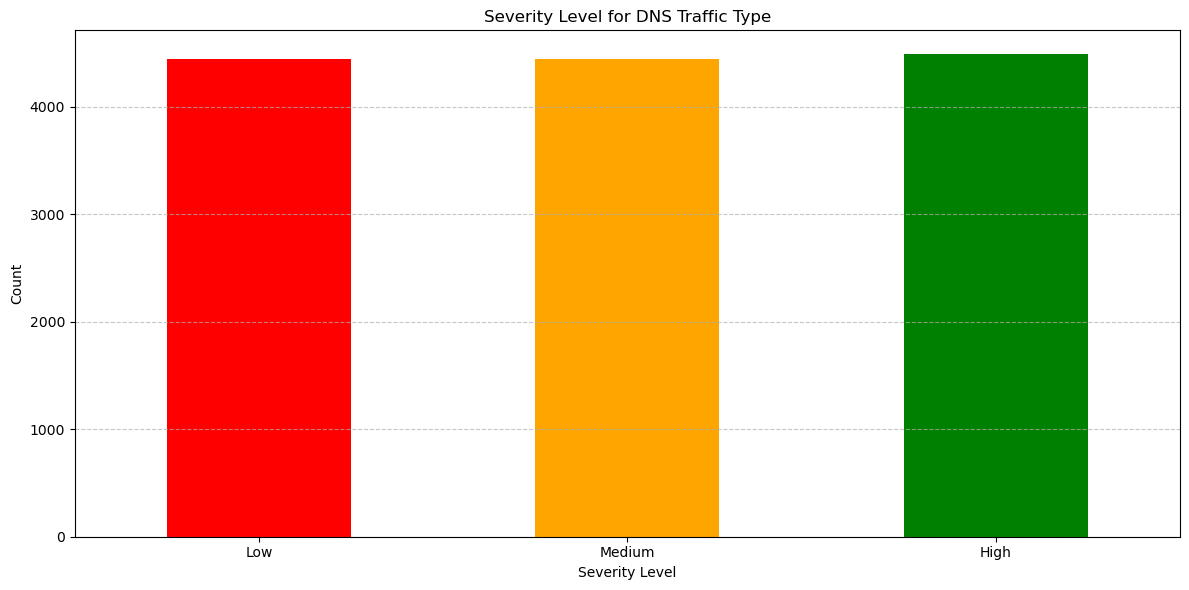

In [92]:
dfDNS = df[df['Traffic Type'] == 'DNS']
dfDNS = dfDNS['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfDNS.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level for DNS Traffic Type')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Severity Level for FTP Traffic Type

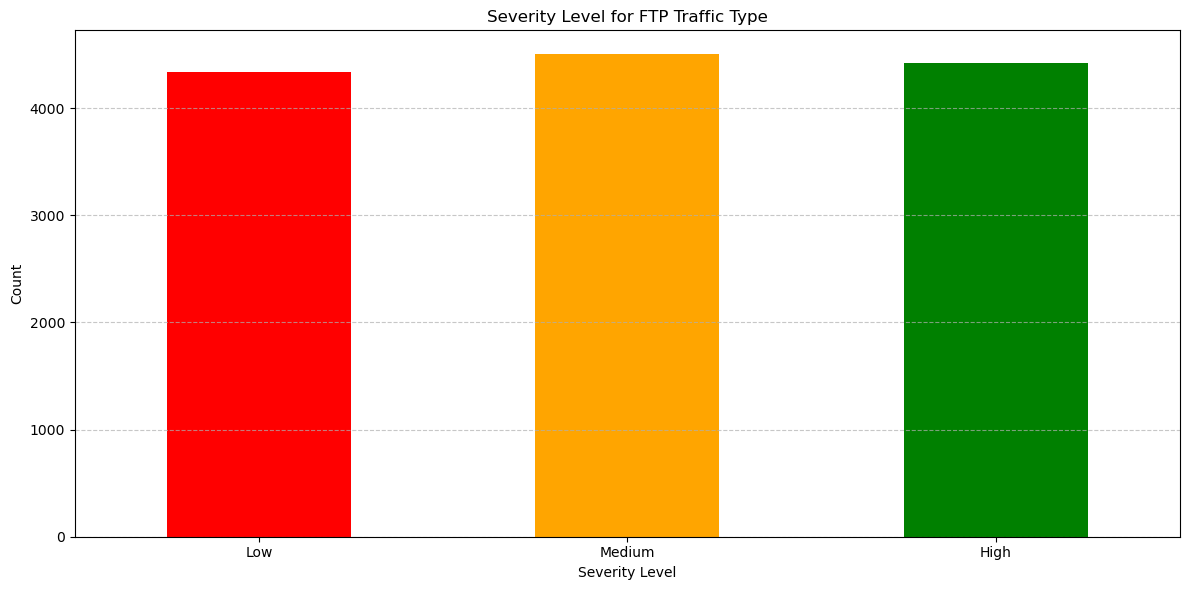

In [94]:
dfFTP = df[df['Traffic Type'] == 'FTP']
dfFTP = dfFTP['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfFTP.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level for FTP Traffic Type')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Severity Level for HTTP Traffic Type

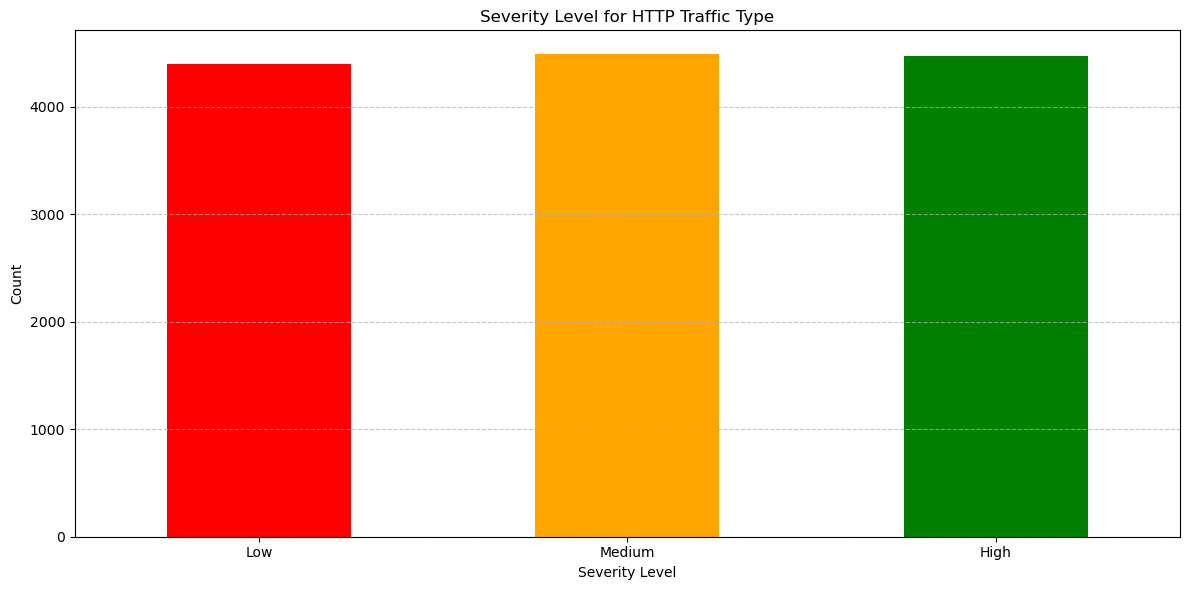

In [96]:
dfHTTP = df[df['Traffic Type'] == 'HTTP']
dfHTTP = dfHTTP['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfHTTP.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level for HTTP Traffic Type')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Traffic Type and Severity Level Chi-Square Test

In [98]:
contingency_table = pd.crosstab(df['Traffic Type'], df['Severity Level'])

chi2, p, dof, expected_contingency_table = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

print("\nExpected frequencies table:")
print(expected_contingency_table)

print("\nContingency Table:")
print(contingency_table)

Chi-square test results:
Chi-square statistic: 1.5585651923361141
P-value: 0.8162191866755938
Degrees of freedom: 4

Expected frequencies table:
[[4474.9408 4408.3952 4492.664 ]
 [4437.4712 4371.4828 4455.046 ]
 [4469.588  4403.122  4487.29  ]]

Contingency Table:
Severity Level  High   Low  Medium
Traffic Type                      
DNS             4484  4446    4446
FTP             4424  4340    4500
HTTP            4474  4397    4489


### Histogram of Anomaly Scores with Low Severity Level

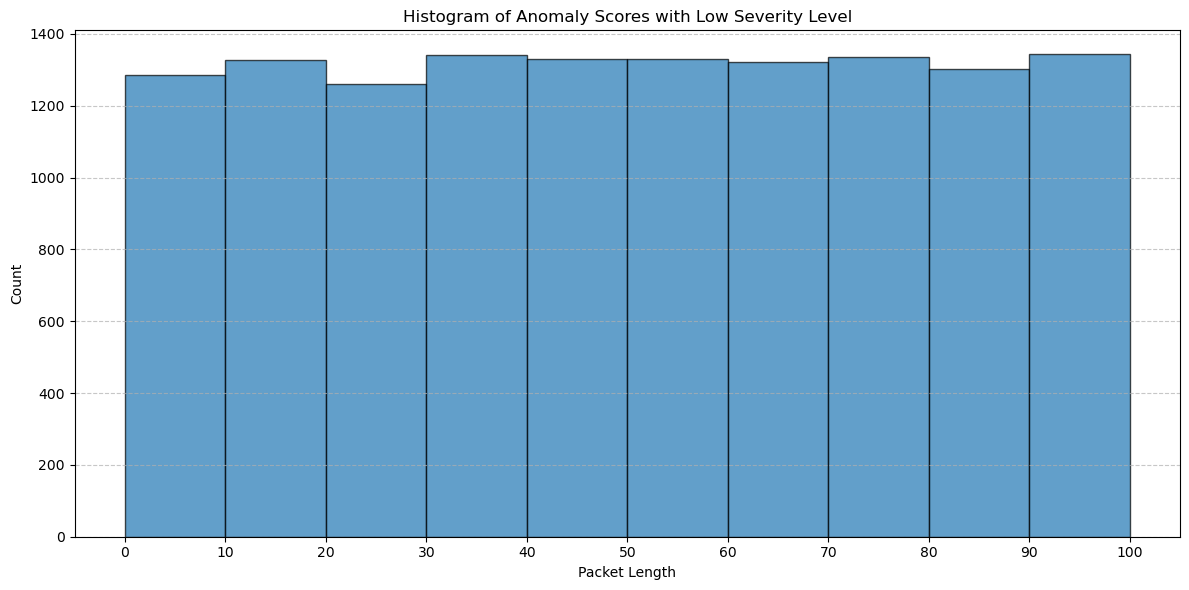

In [100]:
dfLow = df[df['Severity Level'] == 'Low'] #EF
bins = range(0, 110, 10)  # for x axis to show 1-1600 in intervals of 100

plt.figure(figsize=(12, 6))
plt.hist(dfLow['Anomaly Scores'], bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel('Packet Length')
plt.ylabel('Count')
plt.title('Histogram of Anomaly Scores with Low Severity Level')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Histogram of Anomaly Scores with Medium Severity Level

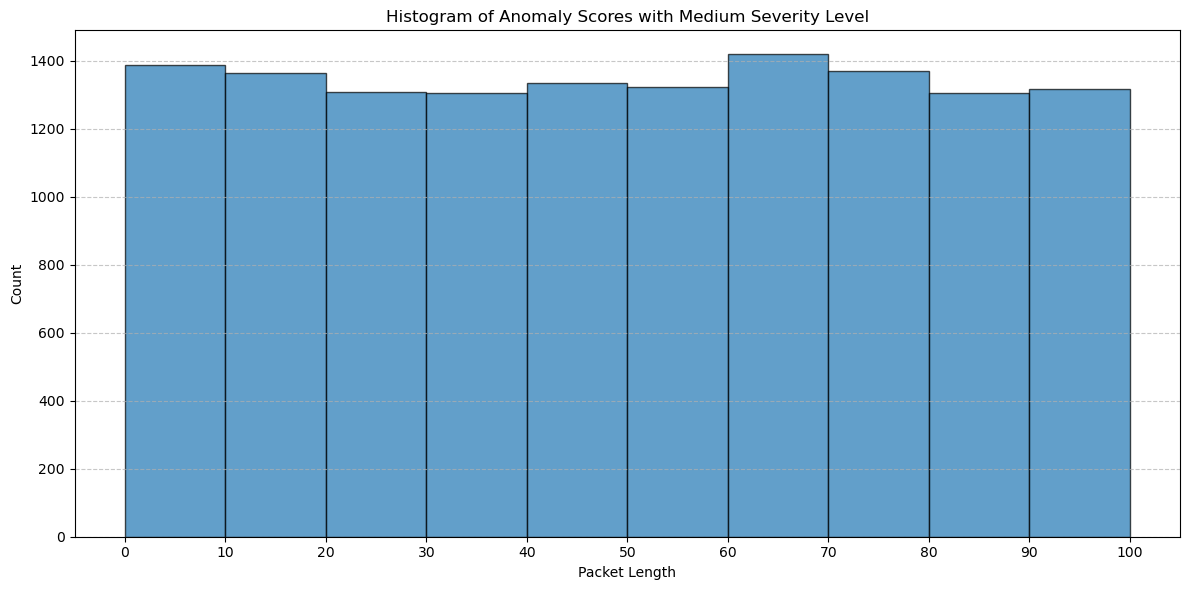

In [102]:
dfMedium = df[df['Severity Level'] == 'Medium'] #EF
bins = range(0, 110, 10)  # for x axis to show 1-1600 in intervals of 100

plt.figure(figsize=(12, 6))
plt.hist(dfMedium['Anomaly Scores'], bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel('Packet Length')
plt.ylabel('Count')
plt.title('Histogram of Anomaly Scores with Medium Severity Level')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Histogram of Anomaly Scores with High Severity Level

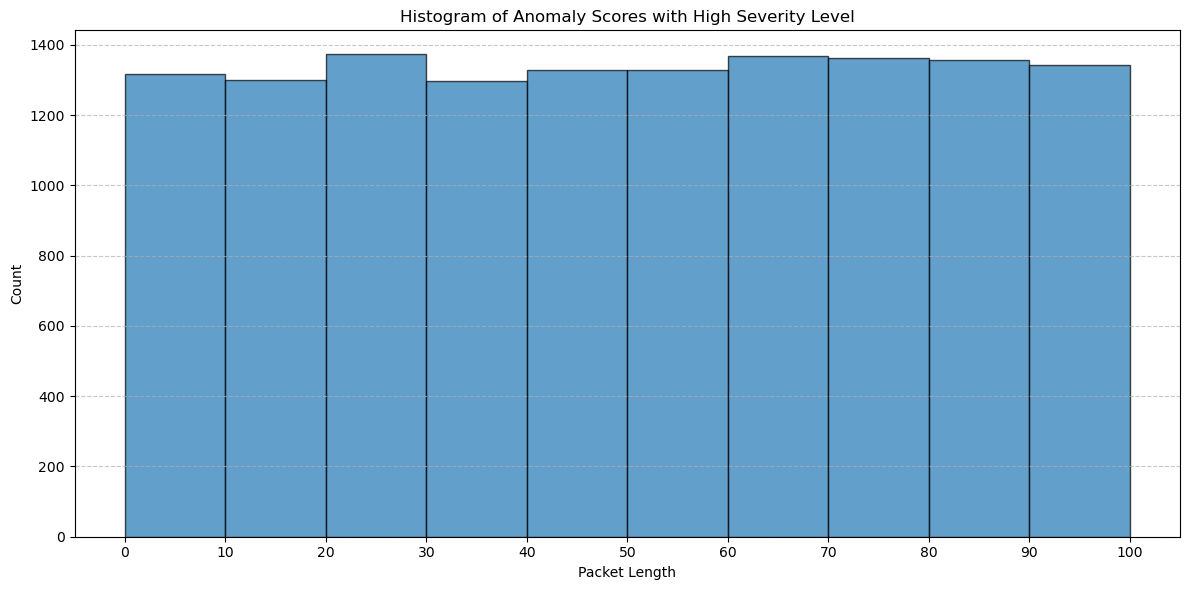

In [104]:
dfHigh = df[df['Severity Level'] == 'High'] #EF
bins = range(0, 110, 10)  # for x axis to show 1-1600 in intervals of 100

plt.figure(figsize=(12, 6))
plt.hist(dfHigh['Anomaly Scores'], bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel('Packet Length')
plt.ylabel('Count')
plt.title('Histogram of Anomaly Scores with High Severity Level')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### BoxPlot of Anomaly Scores and Severity Level

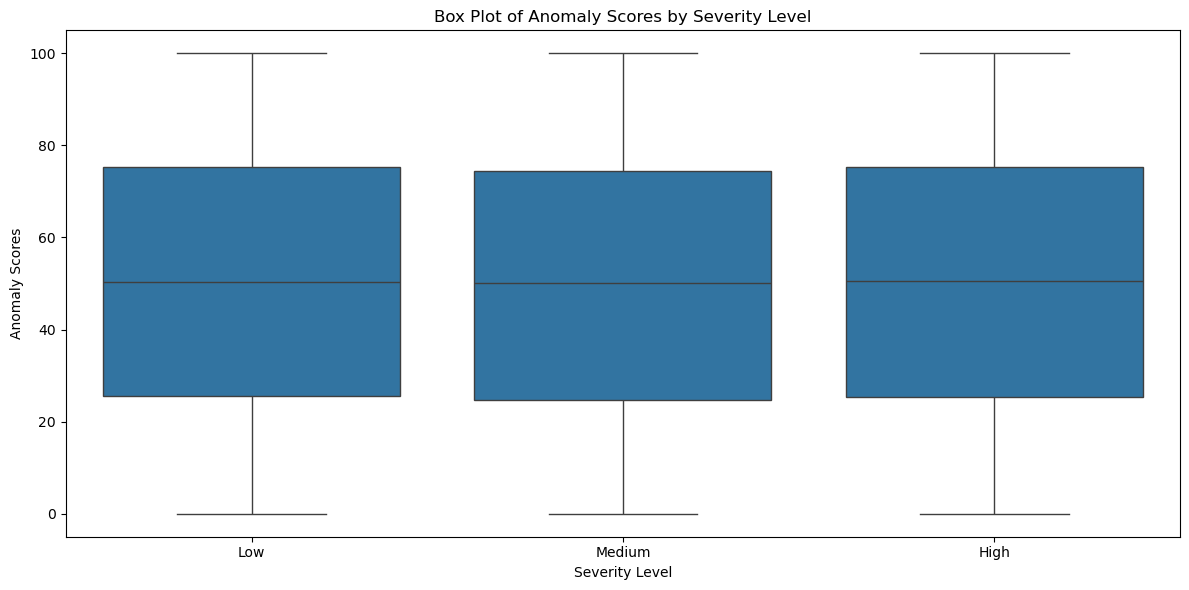

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Severity Level', y='Anomaly Scores', data=df, order=['Low', 'Medium', 'High'])
plt.title('Box Plot of Anomaly Scores by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Anomaly Scores')
plt.tight_layout()
plt.show()

### Anomaly Scores and Severity Level Kruskal-Wallis H-Test

In [108]:
hstat, pvalue = testRelation.kruskal(
    df[df['Severity Level'] == 'Low']['Anomaly Scores'],
    df[df['Severity Level'] == 'Medium']['Anomaly Scores'],
    df[df['Severity Level'] == 'High']['Anomaly Scores']
)
print(f"H-statistic: {hstat}, P-value: {pvalue}")

H-statistic: 2.29213851201709, P-value: 0.31788383680347976


### Severity Level Counts for Alert Triggered

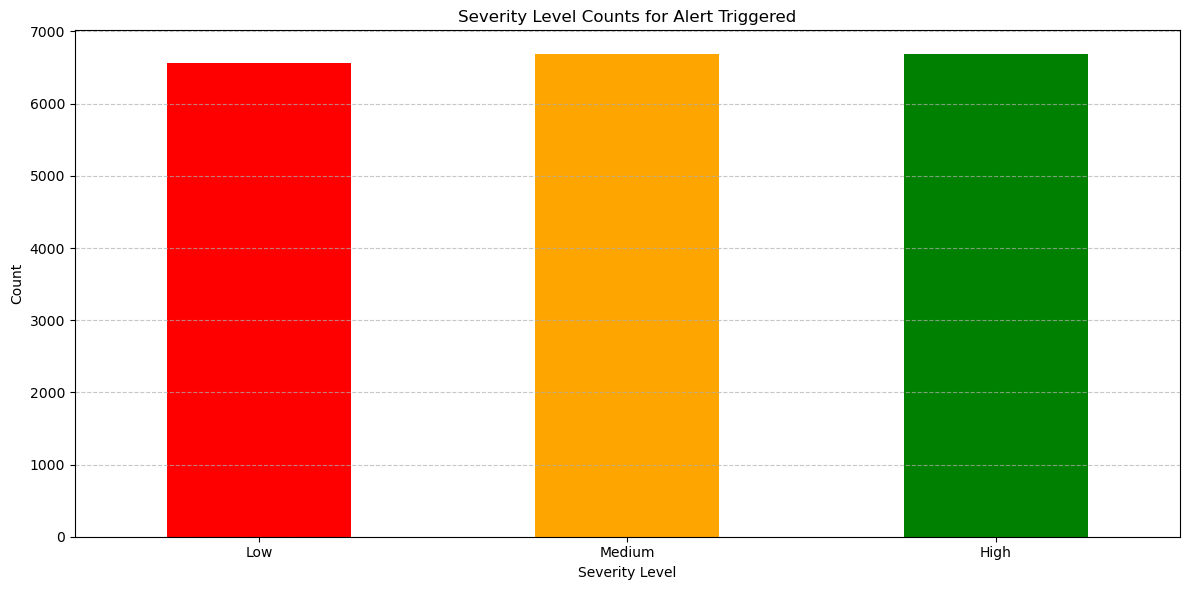

In [110]:
dfTriggered = df[df['Alerts/Warnings'] == 'Alert Triggered']
dfTriggered = dfTriggered['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfTriggered.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Alert Triggered')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Severity Level Counts for Alert Not Triggered

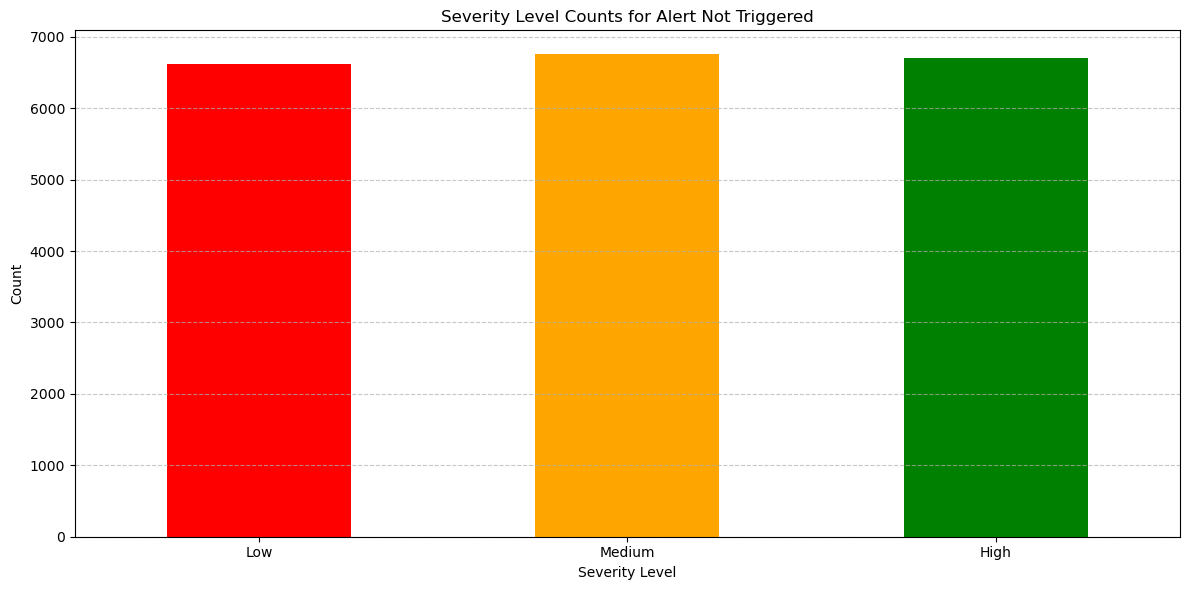

In [112]:
dfNotTriggered = df[df['Alerts/Warnings'] == 'Alert Not Triggered']
dfNotTriggered = dfNotTriggered['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfNotTriggered.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Alert Not Triggered')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Alerts/Warnings and Severity Level Chi-Square Test

In [114]:
contingency_table = pd.crosstab(df['Alerts/Warnings'], df['Severity Level'])

chi2, p, dof, expected_contingency_table = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

print("\nExpected frequencies table:")
print(expected_contingency_table)

print("\nContingency Table:")
print(contingency_table)

Chi-square test results:
Chi-square statistic: 0.10413370750147383
P-value: 0.9492654027688876
Degrees of freedom: 2

Expected frequencies table:
[[6713.41485  6613.581525 6740.003625]
 [6668.58515  6569.418475 6694.996375]]

Contingency Table:
Severity Level       High   Low  Medium
Alerts/Warnings                        
Alert Not Triggered  6700  6614    6753
Alert Triggered      6682  6569    6682


### Severity Level Counts for Malware Attack

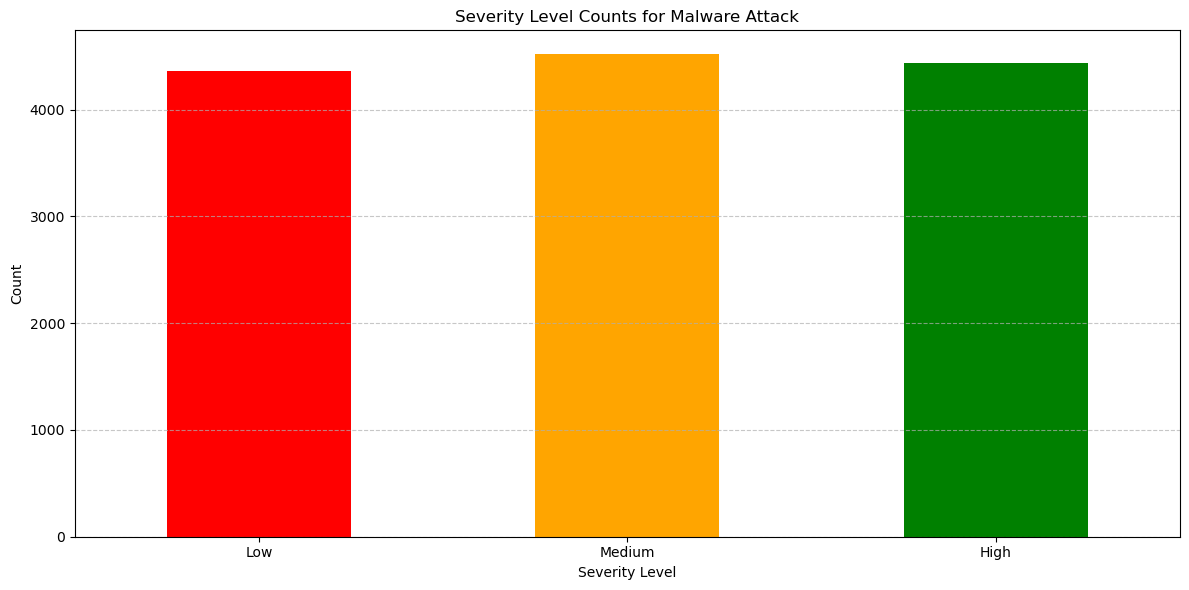

In [116]:
dfTriggered = df[df['Attack Type'] == 'Malware']
dfTriggered = dfTriggered['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfTriggered.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Malware Attack')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Severity Level Counts for DDOS Attack

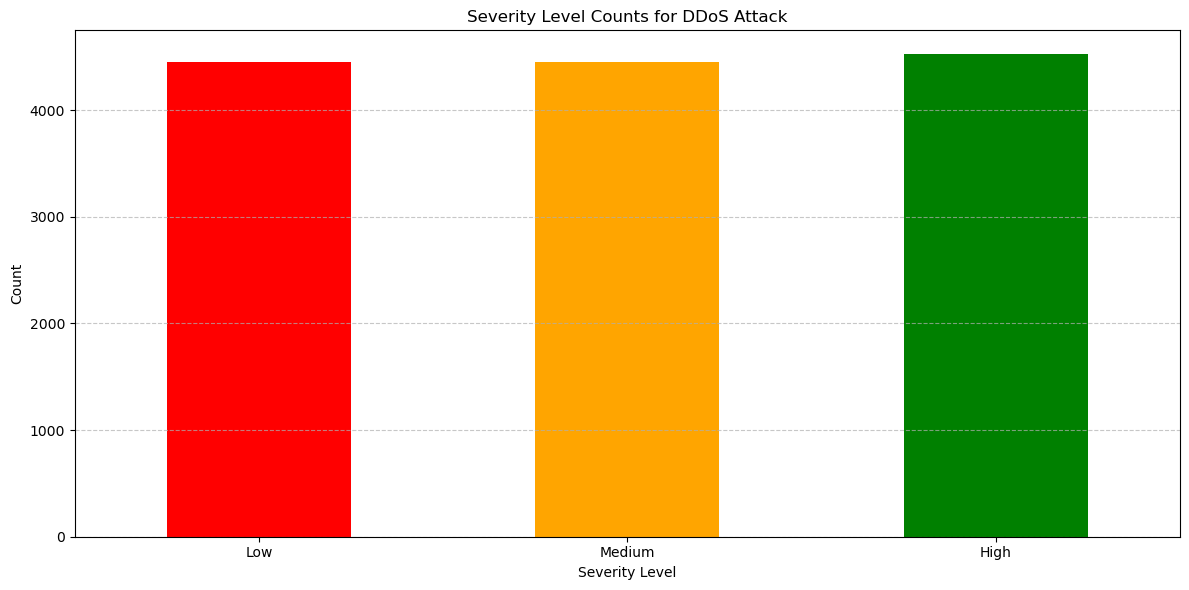

In [118]:
dfTriggered = df[df['Attack Type'] == 'DDoS']
dfTriggered = dfTriggered['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfTriggered.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for DDoS Attack')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

### Severity Level Counts for Intrusion Attack

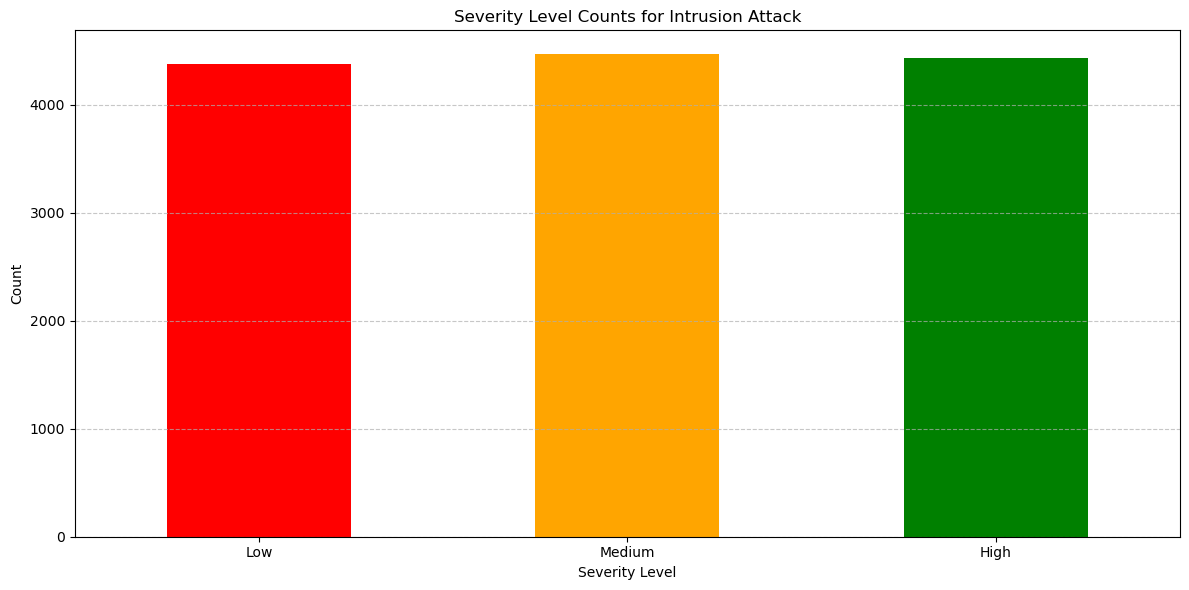

In [120]:
dfTriggered = df[df['Attack Type'] == 'Intrusion']
dfTriggered = dfTriggered['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfTriggered.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Intrusion Attack')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Attack Types and Severity Level Chi-Square Test

In [122]:
contingency_table = pd.crosstab(df['Attack Type'], df['Severity Level'])

chi2, p, dof, expected_contingency_table = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

print("\nExpected frequencies table:")
print(expected_contingency_table)

print("\nContingency Table:")
print(contingency_table)

Chi-square test results:
Chi-square statistic: 1.797089107840153
P-value: 0.7730148764106086
Degrees of freedom: 4

Expected frequencies table:
[[4492.3374   4425.5331   4510.1295  ]
 [4437.80575  4371.812375 4455.381875]
 [4451.85685  4385.654525 4469.488625]]

Contingency Table:
Severity Level  High   Low  Medium
Attack Type                       
DDoS            4523  4450    4455
Intrusion       4427  4374    4464
Malware         4432  4359    4516


### Severity Level Counts for Server Log Source

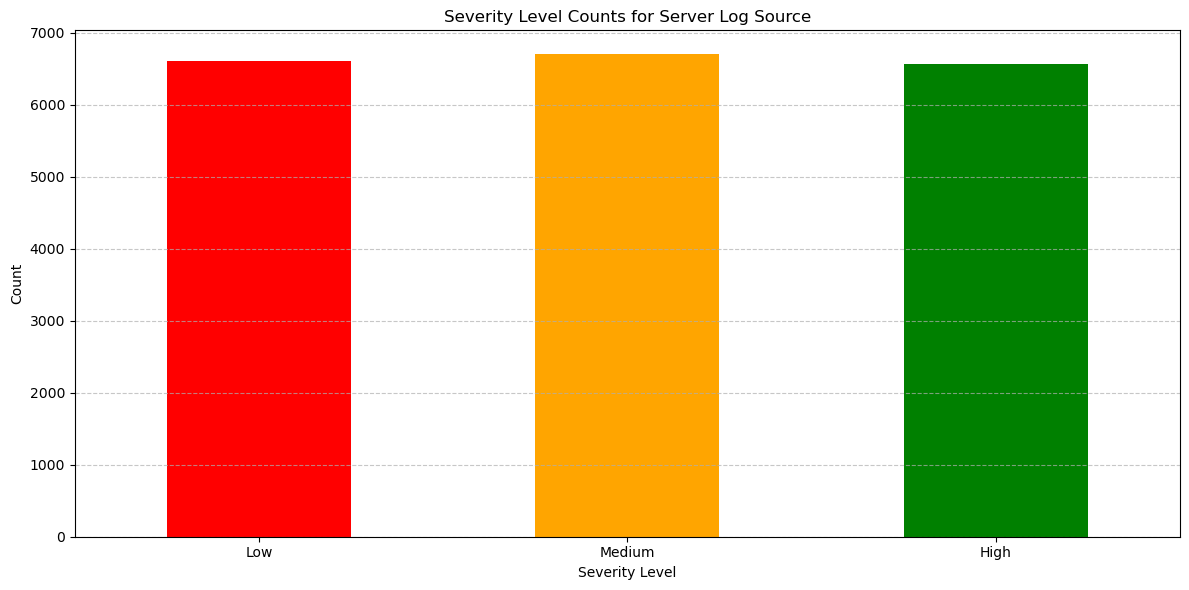

In [124]:
dfTriggered = df[df['Log Source'] == 'Server']
dfTriggered = dfTriggered['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfTriggered.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Server Log Source')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Severity Level Counts for Firewall Log Source

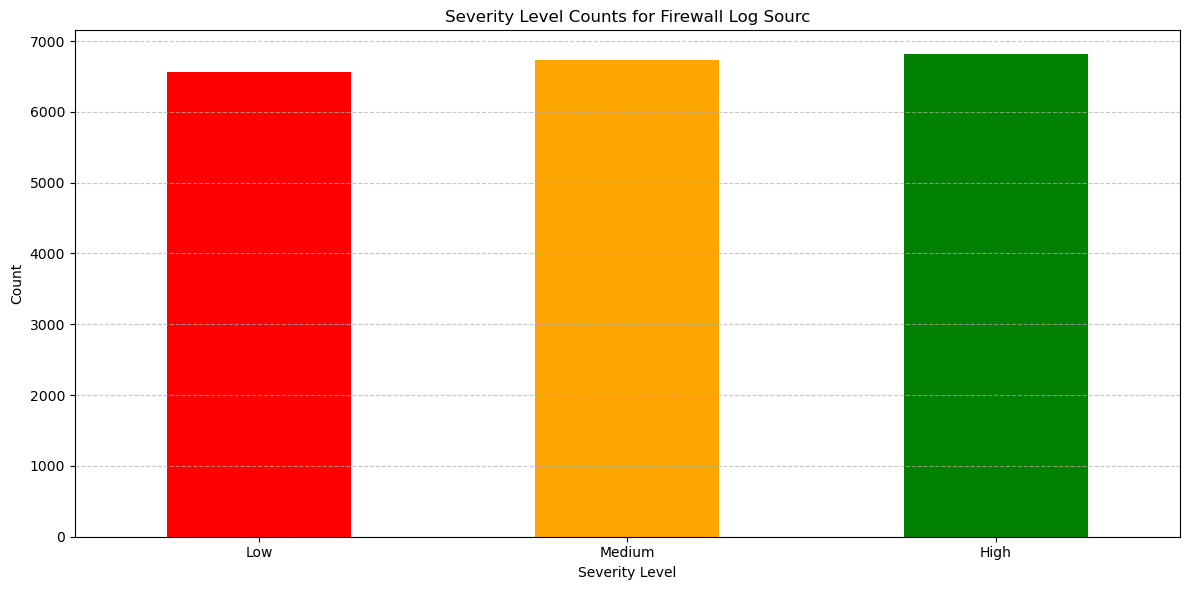

In [126]:
dfTriggered = df[df['Log Source'] == 'Firewall']
dfTriggered = dfTriggered['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfTriggered.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Firewall Log Sourc')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Log Source and Severity Level Chi-Square Test

In [128]:
contingency_table = pd.crosstab(df['Log Source'], df['Severity Level'])

chi2, p, dof, expected_contingency_table = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

print("\nExpected frequencies table:")
print(expected_contingency_table)

print("\nContingency Table:")
print(contingency_table)

Chi-square test results:
Chi-square statistic: 3.1902328085057374
P-value: 0.20288491046152993
Degrees of freedom: 2

Expected frequencies table:
[[6729.8078 6629.7307 6756.4615]
 [6652.1922 6553.2693 6678.5385]]

Contingency Table:
Severity Level  High   Low  Medium
Log Source                        
Firewall        6811  6570    6735
Server          6571  6613    6700


### Severity Level Counts for Known Pattern A Attack Signature

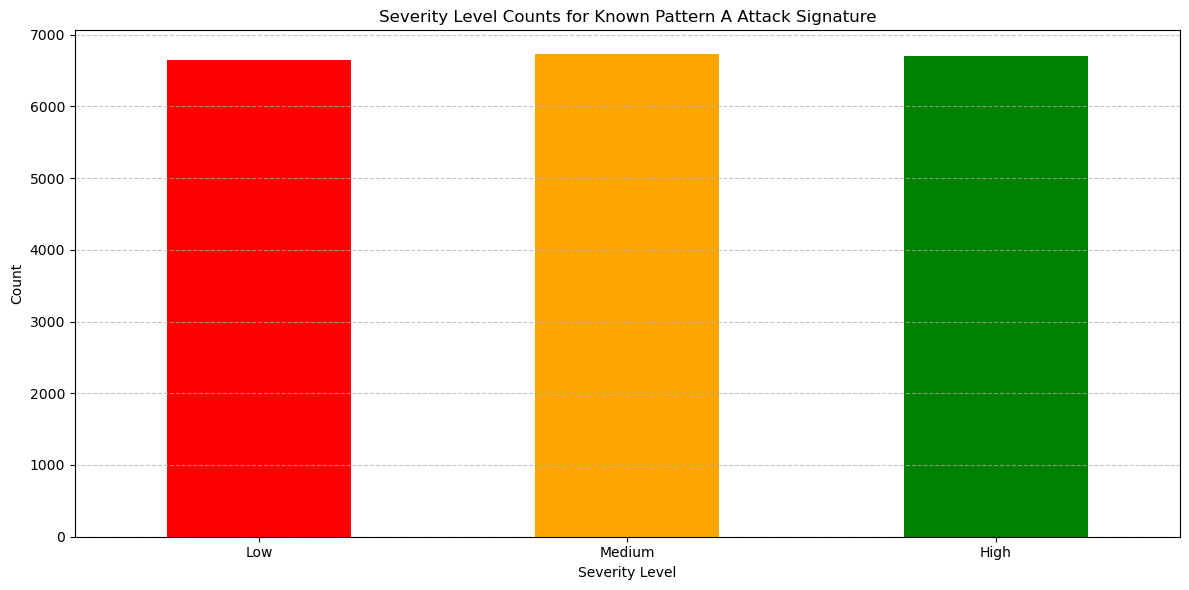

In [130]:
dfPatternA = df[df['Attack Signature'] == 'Known Pattern A']
dfPatternA = dfPatternA['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfPatternA.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Known Pattern A Attack Signature')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Severity Level Counts for Known Pattern B Attack Signature

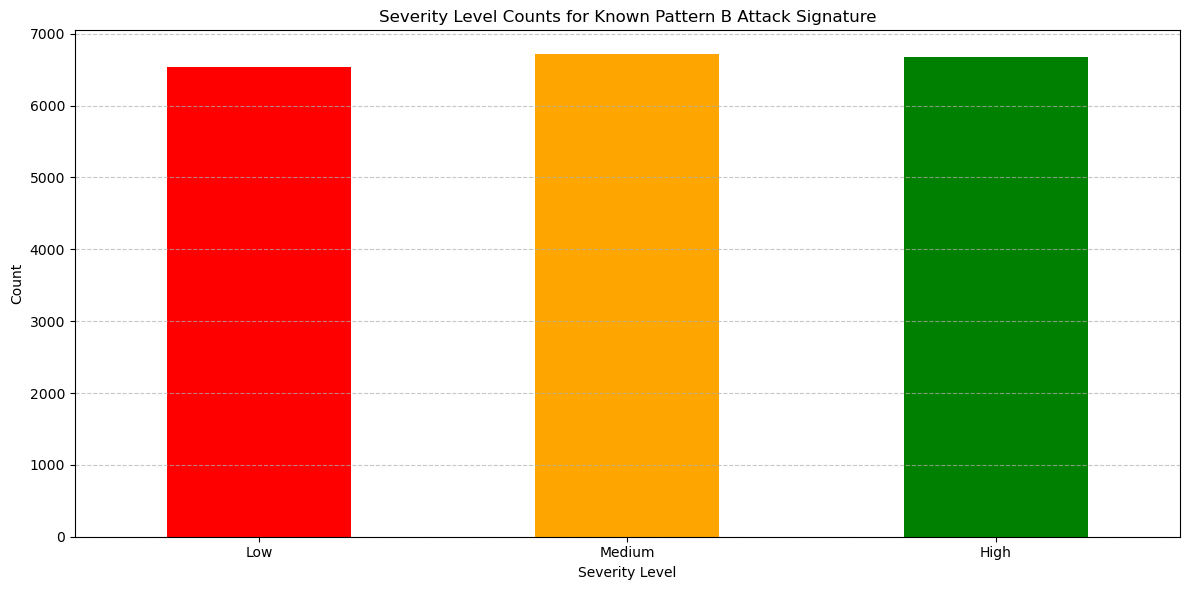

In [132]:
dfPatternB = df[df['Attack Signature'] == 'Known Pattern B']
dfPatternB = dfPatternB['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfPatternB.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Known Pattern B Attack Signature')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Attack Signature and Severity Level Chi-Square Test

In [134]:
contingency_table = pd.crosstab(df['Attack Signature'], df['Severity Level'])

chi2, p, dof, expected_contingency_table = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

print("\nExpected frequencies table:")
print(expected_contingency_table)

print("\nContingency Table:")
print(contingency_table)

Chi-square test results:
Chi-square statistic: 0.5128393912812989
P-value: 0.7738171329535634
Degrees of freedom: 2

Expected frequencies table:
[[6716.4258 6616.5477 6743.0265]
 [6665.5742 6566.4523 6691.9735]]

Contingency Table:
Severity Level    High   Low  Medium
Attack Signature                    
Known Pattern A   6703  6650    6723
Known Pattern B   6679  6533    6712


## OS Type vs Severity Level

In [136]:
import re

# Function to extract OS
def extract_os(device_info):
    if re.search(r'Windows', device_info, re.IGNORECASE):
        return 'Windows'
    elif re.search(r'Linux', device_info, re.IGNORECASE):
        return 'Linux'
    elif re.search(r'MacOS|Mac OS|Macintosh', device_info, re.IGNORECASE):
        return 'MacOS'
    elif re.search(r'iPhone OS|iPod|iOS', device_info, re.IGNORECASE):
        return 'iOS'
    elif re.search(r'Android', device_info, re.IGNORECASE):
        return 'Android'
    else:
        return 'Unknown'

# Apply the function to create a new OS Type column
df['OS Type'] = df['Device Information'].apply(extract_os)

### Severity Level Counts for Windows OS Type

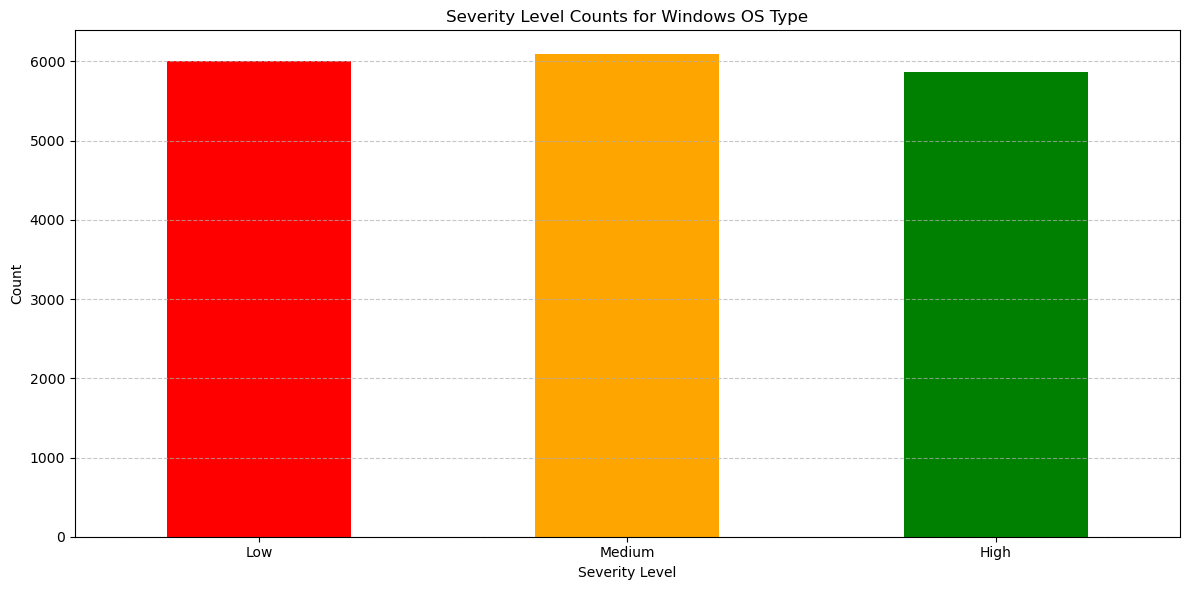

In [138]:
dfWin = df[df['OS Type'] == 'Windows']
dfWin = dfWin['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfWin.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Windows OS Type')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Severity Level Counts for Linux OS Type

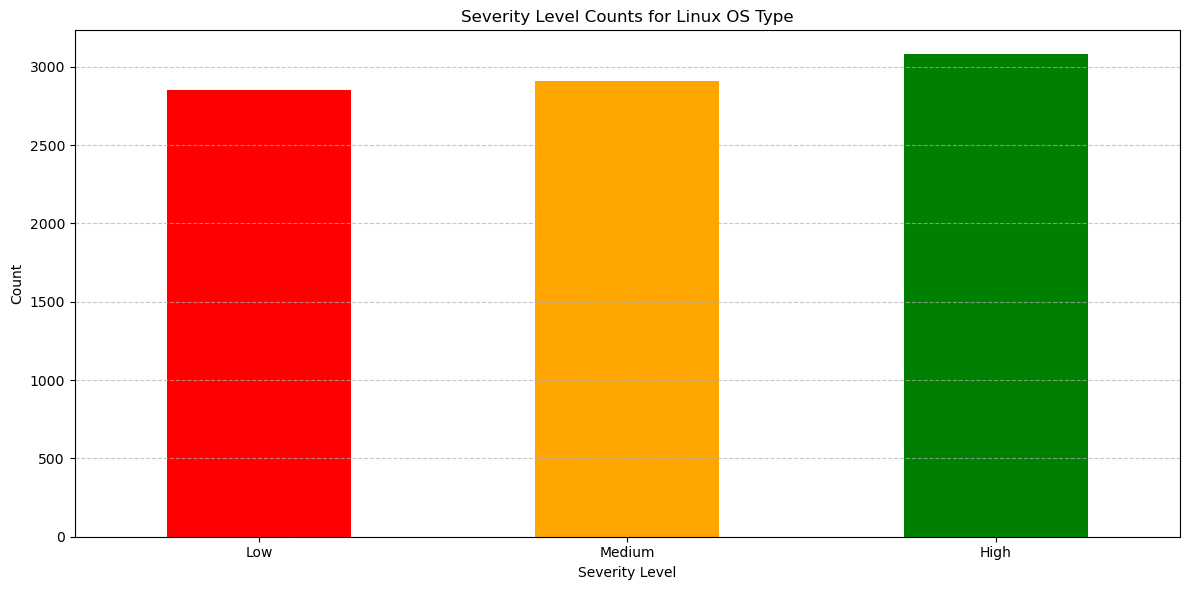

In [140]:
dfLinux = df[df['OS Type'] == 'Linux']
dfLinux = dfLinux['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfLinux.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Linux OS Type')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Severity Level Counts for MacOS OS Type

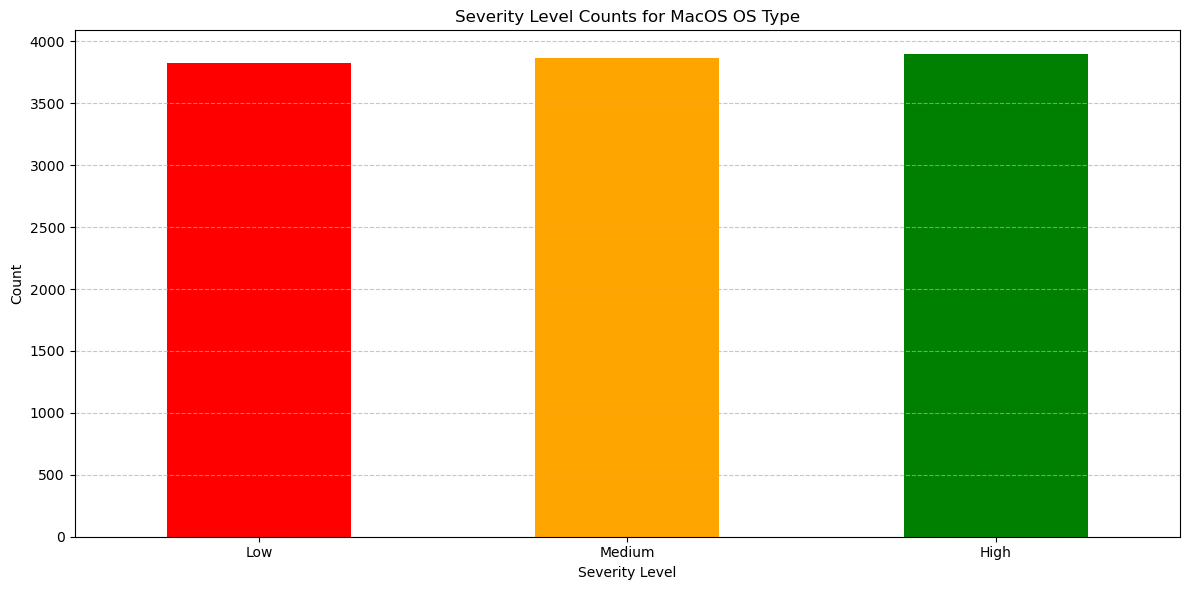

In [142]:
dfMacOS = df[df['OS Type'] == 'MacOS']
dfMacOS = dfMacOS['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfMacOS.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for MacOS OS Type')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Severity Level Counts for Android OS Type

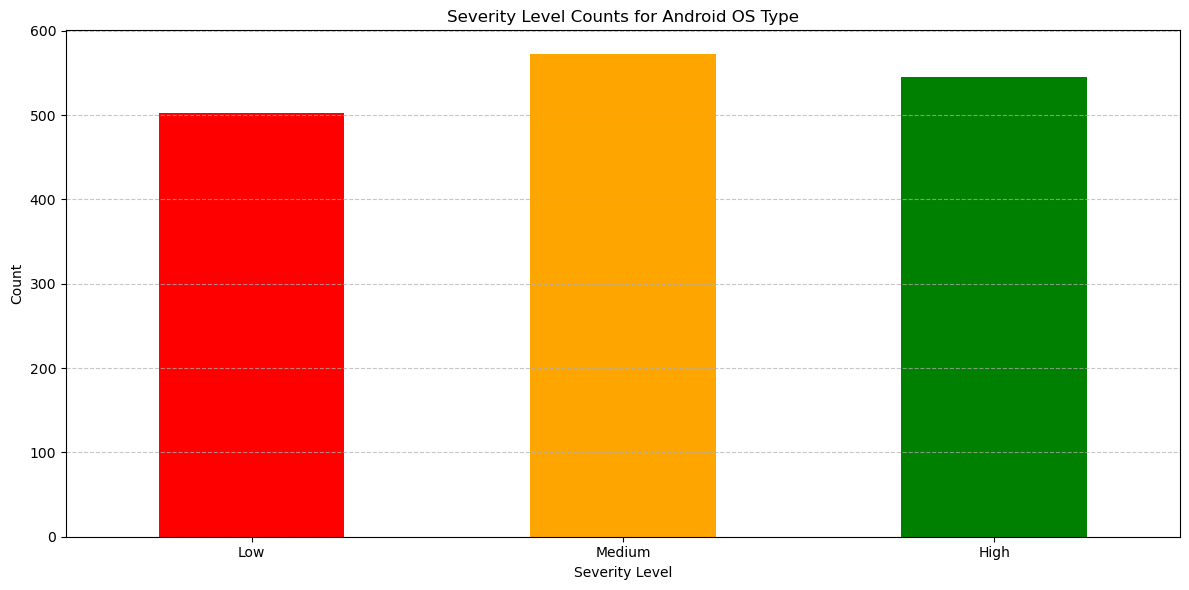

In [144]:
dfAndroid = df[df['OS Type'] == 'Android']
dfAndroid = dfAndroid['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfAndroid.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Android OS Type')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Chi-square test on OS Types

In [146]:
contingency_table = pd.crosstab(df['OS Type'], df['Severity Level'])

chi2, p, dof, expected_contingency_table = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

print("\nExpected frequencies table:")
print(expected_contingency_table)

print("\nContingency Table:")
print(contingency_table)

Chi-square test results:
Chi-square statistic: 16.10221986246731
P-value: 0.01321570243613526
Degrees of freedom: 6

Expected frequencies table:
[[ 541.971     533.9115    544.1175  ]
 [2957.422    2913.443    2969.135   ]
 [3876.43085  3818.785525 3891.783625]
 [6006.17615  5916.859975 6029.963875]]

Contingency Table:
Severity Level  High   Low  Medium
OS Type                           
Android          545   503     572
Linux           3079  2854    2907
MacOS           3894  3825    3868
Windows         5864  6001    6088


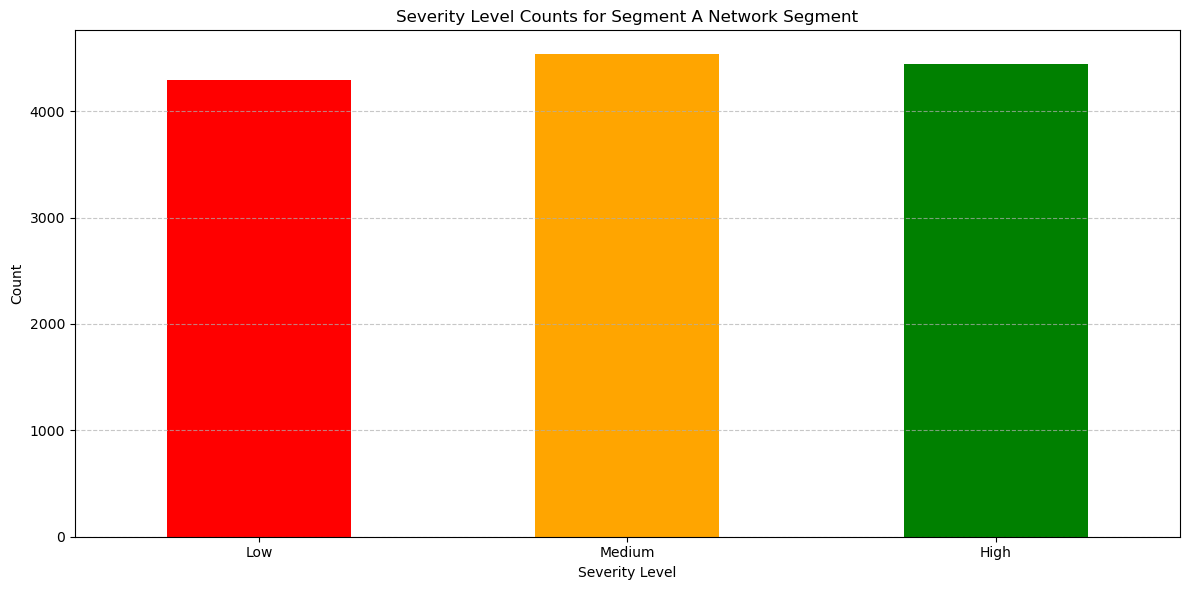

In [147]:
dfSegA = df[df['Network Segment'] == 'Segment A']
dfSegA = dfSegA['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfSegA.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Segment A Network Segment')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

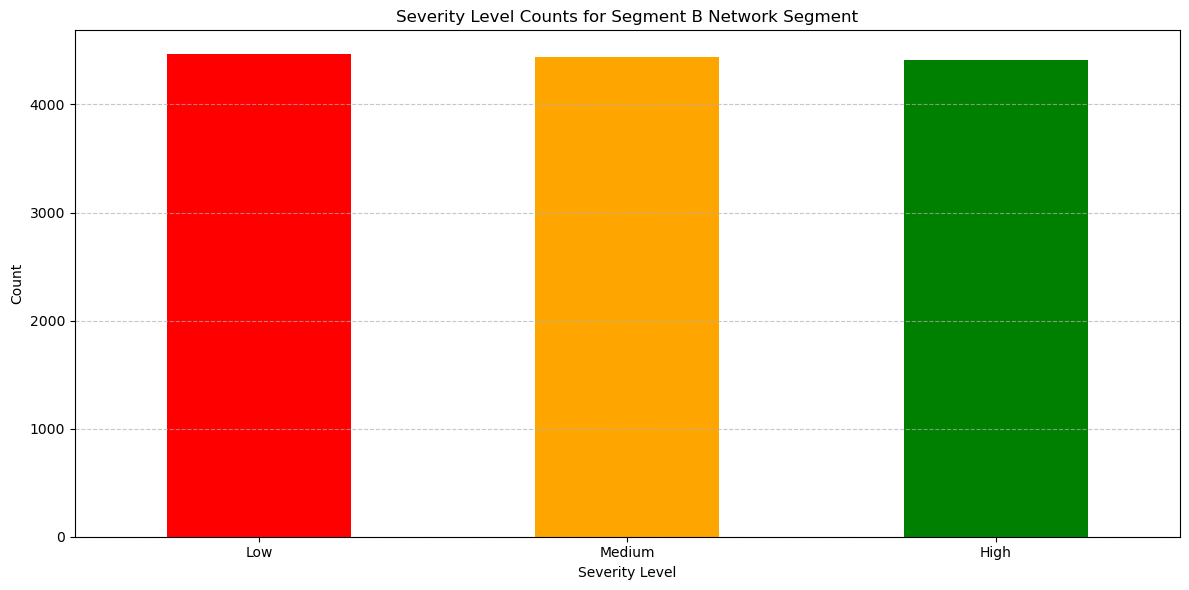

In [148]:
dfSegB = df[df['Network Segment'] == 'Segment B']
dfSegB = dfSegB['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfSegB.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Segment B Network Segment')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

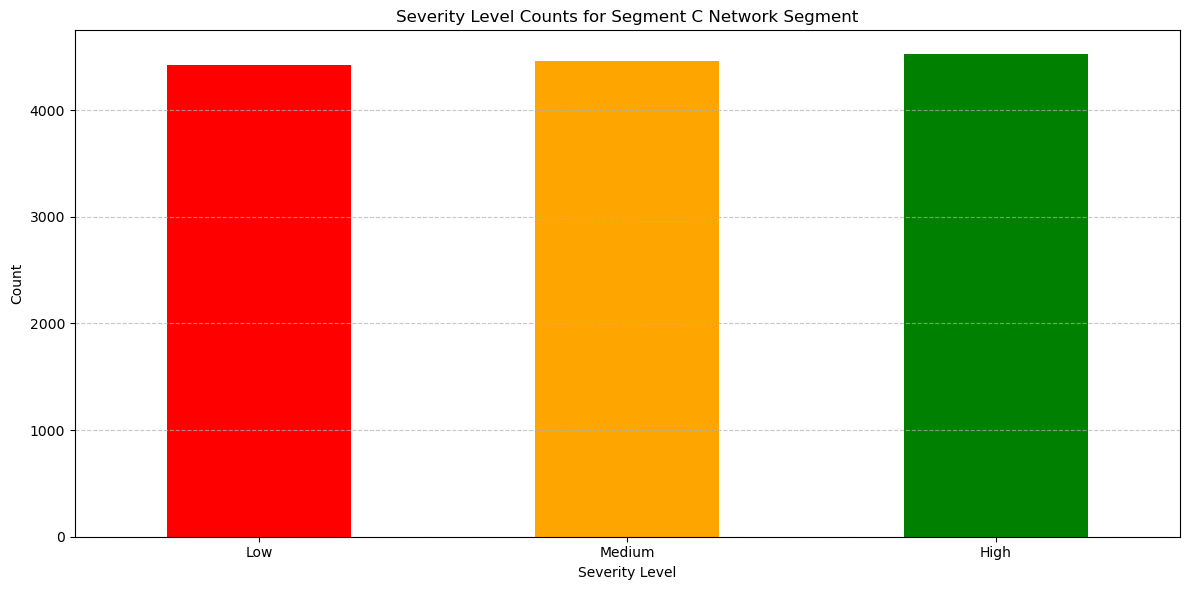

In [149]:
dfSegC = df[df['Network Segment'] == 'Segment C']
dfSegC = dfSegC['Severity Level'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0)

plt.figure(figsize=(12, 6))
dfSegC.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Severity Level Counts for Segment C Network Segment')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()